## Árvores de Decisão Classificação 

<hr>
<br>

<p align=center>
<img src="https://miro.medium.com/max/1798/1*0iIETN4VtYOFke9MK1zi-g.png" width="60%"></p>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score

#### Cancer de mama em Wisconsin  

In [2]:
path = 'data.csv'
data = pd.read_csv(path)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.shape

(569, 33)

In [4]:
# Resultado do exame |  B = Benigno M = Maligno 
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [5]:
# Excluindo coluna inválida
data.drop('Unnamed: 32', axis=1, inplace=True)

In [6]:
# Modelagem baseline 
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=32)

# Encoder 
lb = LabelEncoder()

y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)


# Feature Scaling 
scaler = PowerTransformer()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(lb.transform(['B', 'M']))

[0 1]


In [7]:
# Exemplos Benignos e Malignos dados de treino 
zeros = [i for i in y_train if i ==0]
um = [i for i in y_train if i ==1]

In [8]:
print('Benignos: {} | Malignos: {}'.format(len(zeros), len(um))) 

Benignos: 252 | Malignos: 146


In [9]:
# Árvore pura 

model = DecisionTreeClassifier(random_state=32)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       105
           1       0.90      0.86      0.88        66

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.91       171
weighted avg       0.91      0.91      0.91       171



<br>
<hr>

## Hiperparâmetros 


Árvores de Decisão possuem alguns Hiperparâmetros que ajudam definir a construção do modelo bem ajustado, não permitindo a alta complexidade que se pode ter, Árvores de Decisão muitas vezes possuem uma tendência de Overfitting(Sobreajuste) muito forte,  por conta de se tornarem muito grandes e complexas a um nível de complexidade muito alta, sem dúvidas essa é a pior desvantagem desse algoritmo.  

In [10]:
modelo = DecisionTreeClassifier(criterion='gini',
                                splitter='random',
                                max_depth=6,
                                min_samples_split=5,
                                min_samples_leaf=10)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       105
           1       0.91      0.79      0.85        66

    accuracy                           0.89       171
   macro avg       0.89      0.87      0.88       171
weighted avg       0.89      0.89      0.89       171



<br>
<hr>
<hr>
<hr>

### MAX_DEPTH 

A profundidade máxima da árvore. Se for <b> "None" </b> os nós serão expandidos até que todas as folhas estejam puras ou até que todas as folhas contenham menos amostras definido em outro Hiperparâmetro o <b> MIN_SAMPLES_SPLIT </b>

A imagem abaixo ilustra o MAX_DEPTH que é a profundidade, de todos os ramos contidos na Árvore este hiperparâmetro ajuda a conter uma forte tendência a Overfitting, limitando o crescimento e a complexidade que a Árvore pode ter. 

<p align=center>
<img src="https://www.researchgate.net/profile/Russell_Yost/publication/221916044/figure/fig1/AS:671528903524356@1537116375163/Decision-tree-illustrating-Depth-first-searches-pathway-example-1-Breadth-first.png" width="60%"></p>
<br>

<b> ELE NÃO CONTABILIZA O NÓ RAIZ, SOMENTE OS PRÓXIMOS RAMOS DA ÁRVORE SÃO CONTABILIZADOS NO MAX_DEPTH </b>

<br>
<hr>


In [11]:
# MAX_DEPTH definido no valor igual a 6 

modelo = DecisionTreeClassifier(max_depth=6, random_state=10)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       105
           1       0.87      0.89      0.88        66

    accuracy                           0.91       171
   macro avg       0.90      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



<br>
<hr>
<hr>
<hr>

### MIN_SAMPLES_SPLIT 


O número mínimo de amostras necessárias para dividir um nó interno. Por padrão é definido <b> MIN_SAMPLES_SPLIT=2 </b>
* Deve ser definido o número de amostras mínimas para ocorrer o split.
* Valores altos implicam em complexidade na poda.

Na imagem ilustra o hiperparâmetro MIN_SAMPLES_SPLIT definido com o valor 11, observe que se MAX_DEPTH não for definido com nenhum valor a árvore encerra sua construção quando o número mínimo de amostras para o split nas folhas não é atendido.  




<p align=center>
<img src="https://gblobscdn.gitbook.com/assets%2F-LagOeJ2nL90MQERwhxy%2F-LjmGR4-Zkpsp-CXV3zt%2F-Lk-zrrQar1T7mfpJ4jY%2Fimage.png?alt=media&token=75b26a95-2227-4832-8860-8e1086a4743b" width="80%"></p>

In [12]:
# MIN_SAMPLES_SPLIT definido como 11 amostras mínimas para a separação 

modelo = DecisionTreeClassifier(min_samples_split=11, random_state=10)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.92      0.89      0.91        66

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.93      0.93      0.93       171



<br>
<hr>
<hr>
<hr>

### MIN_SAMPLES_LEAF 

O número mínimo de amostras necessárias para estar em um nó folham, só é feita a divisão em qualquer profundidade através desse hiperparâmetro.

* Tem o Efeito de suavizar o modelo

In [13]:
# MIN_SAMPLES_LEAF definido como 7 amostras mínimas em nós folhas  

modelo = DecisionTreeClassifier(min_samples_leaf=7, random_state=10)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       105
           1       0.90      0.94      0.92        66

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



<br>
<hr>
<hr>
<hr>

### Diferenças entre MIN_SAMPLES_SPLIT e MIN_SAMPLES_LEAF 

* A principal diferença entre as duas é que min_samples_leafgarante um número mínimo de amostras em uma folha, enquanto min_samples_splitpode criar pequenas folhas arbitrárias, embora min_samples_splitseja mais comum na literatura.



* min_samples_splitespecifica o número mínimo de amostras necessárias para dividir um nó interno , enquanto min_samples_leafespecifica o número mínimo de amostras necessárias para estar em um nó folha.


* Por exemplo, se min_samples_split = 5e houver 7 amostras em um nó interno, a divisão será permitida. Mas digamos que a divisão resulta em duas folhas, uma com 1 amostra e outra com 6 amostras. Se min_samples_leaf = 2, a divisão não será permitida (mesmo se o nó interno tiver 7 amostras), porque uma das folhas resultantes terá menos que o número mínimo de amostras necessárias para estar em um nó folha.



* <b> min_samples_leaf garante um número mínimo de amostras em cada folha, independentemente do valor de min_samples_split. </b>

<br>
<hr>
<hr>
<hr>

### MAX_FEATURES 

O número máximo de features a serem considerados ao procurar a melhor divisão da árvore.

* Padrão = Nenhum | max_features = n_features 
* AUTO = Raiz quadrada do Número de features 
* SQRT = Raiz quadrada do Número de features 
* LOG2 = Log de base 2 do Número de features 



Max_features é o número de features a serem considerados a cada vez para tomar a decisão de divisão dos ramos da árvore. Digamos que a dimensão dos seus dados seja 50 e a max_feature seja 10, sempre que precisar encontrar a divisão, o modelo seleciona aleatoriamente 10 features e as utiliza para decidir qual dos 10 é a melhor feature a ser usada. Quando você passa para o próximo nó, seleciona aleatoriamente outros 10 e assim por diante.



<b>Esse mecanismo é usado para controlar o Sobreajuste(Overfitting) </b>

<br>

In [14]:
# MAX_FEATURES = 5 
# AUTO 
# SQRT 
# LOG2 

modelo = DecisionTreeClassifier(max_features=5, random_state=10)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       105
           1       0.90      0.85      0.88        66

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



<br>
<hr>
<hr>
<hr>

### MAX_LEAF_NODES 


Esse hiperparâmetro define o crescimento da árvore com os melhores nós definidos como redução relativa da impureza, define o número máximo de folhas contidos na árvore.

* Padrão = Nenhum | Número ilimitado de Nós folhas 

Na imagem um exemplo de Árvore com <b>MAX_LEAF_NODES = 6</b> Possuindo 6 nós folhas. 

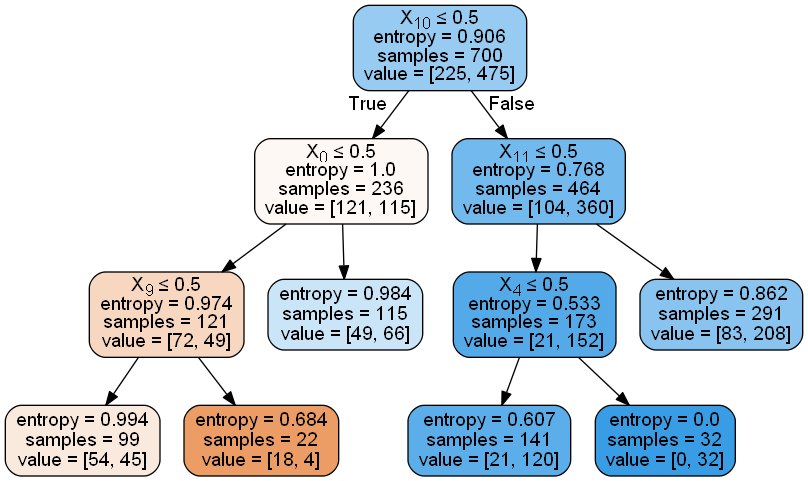

In [15]:
# MAX_LEAF_NODES = 7 

modelo = DecisionTreeClassifier(max_leaf_nodes=7,random_state=10)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       105
           1       0.95      0.91      0.93        66

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



<br>
<hr>
<hr>
<hr>

### MIN_IMPURITY_DECREASE 

Um nó será dividido se essa divisão indzir uma diminuição da impureza maior ou igual a o valor determinado neste Hiperparâmetro 
definindo um valor de impureza Mínima para ocorrer a divisão, este hiperparâmetro tem dependência de qual o critério escolhido para a construção da árvore, seja Índice Gini ou Entropia, ele vai reter sempre o mínimo da impureza contida nos ramos, para cada Decisão da árvore. 

Será um Limiar para a parada prococe do crescimento da árvore, Um nó será dividido se sua impureza estiver acima do limite, caso contrário, é uma folha.

<br>

<b> Indice Gini tem a variação de 0 a 0.5 enquanto Entropia em casos binários varia de 0 a 1 o que muda a decisão do valor inserido</b>. 


* Padrão = 0 

In [16]:
# MIN_IMPURITY_DESCREASE = 0.035 | Definindo impureza mínima para 0.120 considerada baixa. 

modelo = DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.035, random_state=14)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       105
           1       0.93      0.85      0.89        66

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



<br>
<hr>
<hr>
<hr>

## Tunando Hiperparâmetros 

O tunning de hiperparâmetros é uma das técnicas em Machine learning para encontrar as melhores combinações de valores de hiperparâmetros, para que o modelo tenha uma performance superior, levando o modelo aos melhores hiperparâmetros o objetivo é minimizar ou maximizar a função custo do modelo.

Em árvores de decisão é praticamente indispensável o Tunning de Hiperparâmetros, por ser um modelo não paramétrico e com a complexidade que se tem do algoritmo, é necessário encontrar o melhor ajuste desses valores para o bom desempenho da Árvore. 

<p align=center>
<img src="https://miro.medium.com/max/588/1*KLIIpCw6fpHh49QrjuZpAQ.png" width="60%"></p>

<b> O tunning foi feito com apenas dois Hiperparâmetros de forma simples, por conta da técnica de usar o GridSearchCV não ser a melhor para modelos de árvores, foi usado para exemplificar um Tunning básico e o ganho que há nas métricas</b>

In [17]:
# GridSeachCV 
from sklearn.model_selection import GridSearchCV

In [18]:
mdl = DecisionTreeClassifier()
parametros = {'max_depth':[3,4,7,8],
        'min_samples_leaf':[0,1,4,12]}

grid = GridSearchCV(estimator=mdl, param_grid=parametros, scoring='f1', cv=5, verbose=1)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, 7, 8],
                         '

In [19]:
# Melhor F1 foi no split 4 | F1 Score = 96%
pd.DataFrame(grid.cv_results_).sort_values('split4_test_score', ascending=False).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.002795,0.000399,0.001001,2.780415e-07,3,4,"{'max_depth': 3, 'min_samples_leaf': 4}",0.915254,0.928571,0.892857,0.842105,0.964286,0.908615,0.040530,4
6,0.002996,0.000008,0.001004,7.089335e-06,4,4,"{'max_depth': 4, 'min_samples_leaf': 4}",0.915254,0.928571,0.912281,0.903226,0.949153,0.921697,0.015953,1
10,0.003803,0.000739,0.001000,1.323169e-06,7,4,"{'max_depth': 7, 'min_samples_leaf': 4}",0.915254,0.928571,0.912281,0.900000,0.949153,0.921052,0.016733,2


In [20]:
# Melhor modelo
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
# Melhor modelo do Grid 
mdl = DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, random_state=10)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.92      0.89      0.91        66

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.93      0.93      0.93       171



<br>
<hr>
<hr>

### Visualizando Árvore de Decisão

Uma das vantagens das Árvores de Decisão é poder usar o recurso de visualização da árvore, e interpretar todas as decisões contidas em cada ramo da árvore, desde a raiz até o último nó folha. 

In [22]:
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

[Text(334.8, 332.955, 'X[21] <= 0.377\ngini = 0.465\nsamples = 398\nvalue = [252, 146]'),
 Text(167.4, 237.825, 'X[28] <= 0.479\ngini = 0.133\nsamples = 266\nvalue = [247, 19]'),
 Text(83.7, 142.695, 'X[14] <= 0.822\ngini = 0.033\nsamples = 239\nvalue = [235, 4]'),
 Text(41.85, 47.565, 'gini = 0.017\nsamples = 235\nvalue = [233, 2]'),
 Text(125.55000000000001, 47.565, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(251.10000000000002, 142.695, 'X[2] <= 0.336\ngini = 0.494\nsamples = 27\nvalue = [12, 15]'),
 Text(209.25, 47.565, 'gini = 0.375\nsamples = 16\nvalue = [12, 4]'),
 Text(292.95, 47.565, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(502.20000000000005, 237.825, 'X[27] <= -0.066\ngini = 0.073\nsamples = 132\nvalue = [5, 127]'),
 Text(418.5, 142.695, 'X[16] <= -0.604\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(376.65000000000003, 47.565, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(460.35, 47.565, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(585.9, 142.69

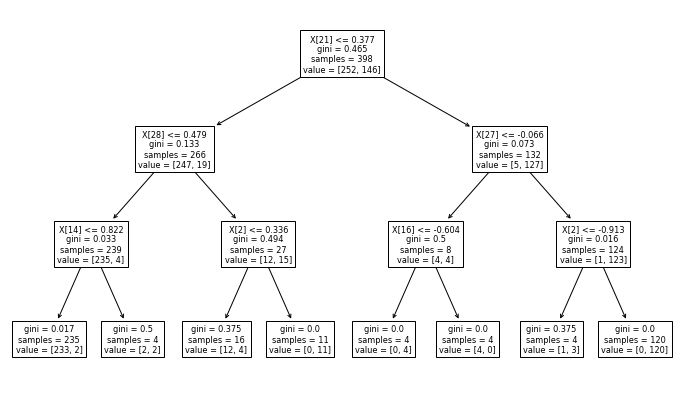

In [23]:
# forma simples 
plt.figure(figsize=(12,7))
plot_tree(mdl)

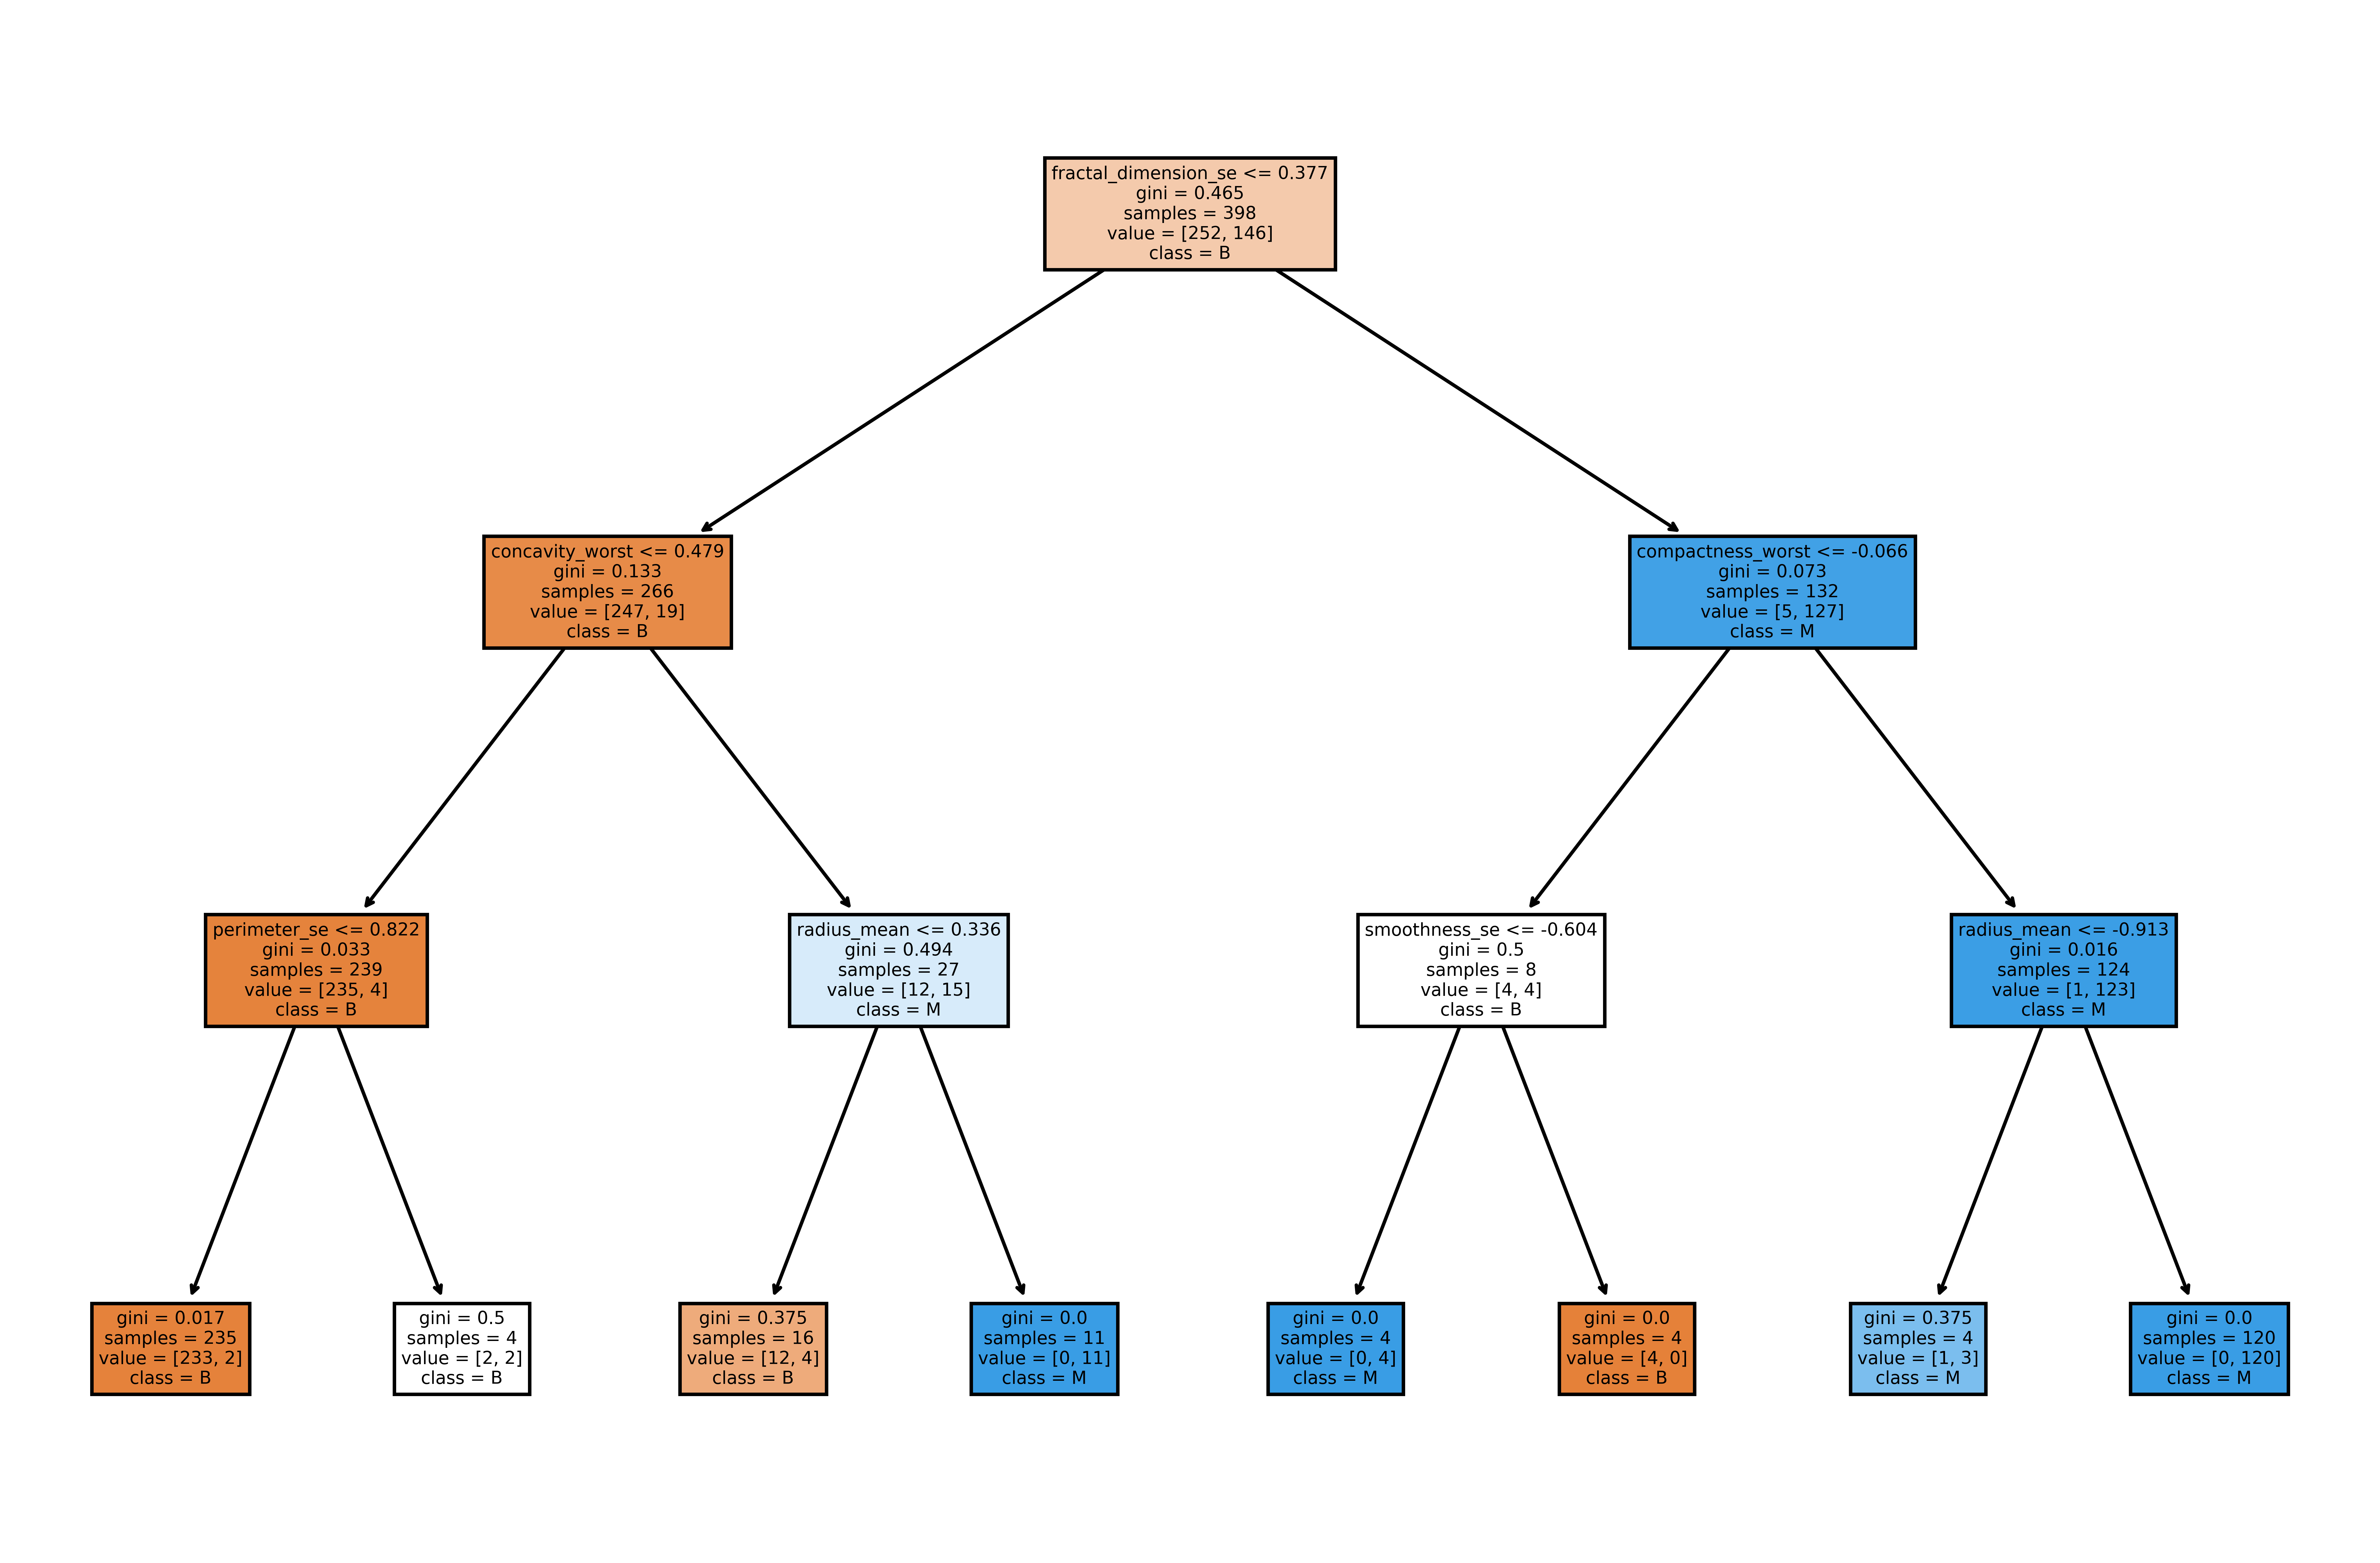

In [24]:
# Features names 
fn=[column for column in data != 'diagnosis']

# Target names  
cn={0:'B', 1:'M'}

# Dimensões da figura 
fig, axes = plt.subplots(nrows= 1, ncols= 1, figsize =(12,8), dpi=800) # DPI definir mínimo = 300 
plot_tree(mdl,
        feature_names=fn, 
        class_names=cn,
         filled=True)

# Salvar imagem 
fig.savefig('tree_01.png')

### Feature Importance

Apresenta as features mais importantes consideradas pelo modelo, podemos analisar os resultados e até mesmo criar um outro modelo, utilizando somente as features mais importantes, isso é uma abordagem que pode ser feita mas não e a única. 

In [25]:
import shap 
shap.initjs()

In [26]:
explainer = shap.TreeExplainer(mdl)
shap_values = explainer.shap_values(X_train) # interpretar o treinamento do modelo 

# features
names = list(X.columns)

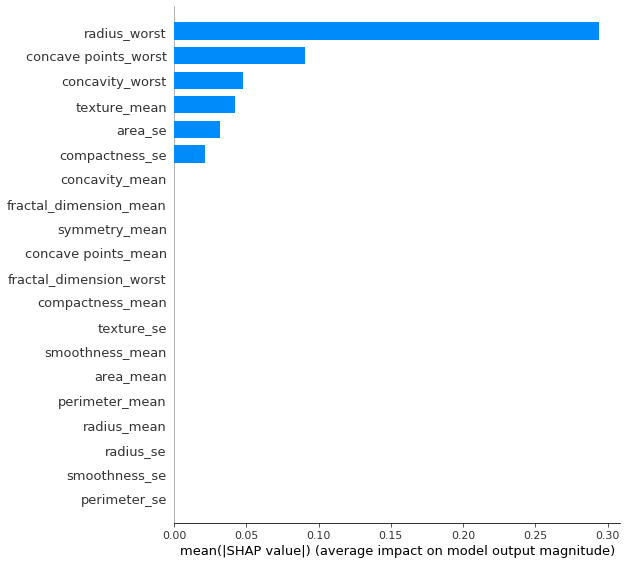

In [27]:
shap.summary_plot(shap_values[1], X_train, plot_type='bar', feature_names=names, title='Feature Importance')

Posso concluir que apenas 6 Features foram consideras com uma margem razoável de importância pelo modelo, as features restantes não obtiveram nenhuma pontuação. 